<a href="https://colab.research.google.com/github/SoundaryaDube/Applied_Machine_Learning/blob/main/Soundarya_Dube_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
file_path = "/content/drive/MyDrive/loan_default_dataset.csv"
data = pd.read_csv(file_path)


In [4]:
data.head()

,Client ID,Age,Gender,Loan size,Times payment was overdue,Defaulted?
0,1,53,M,"$10,000",2,No
1,2,39,F,"$50,000",5,No
2,3,32,F,"$10,000",7,No
3,4,45,M,"$10,000",10,No
4,5,43,F,"$30,000",10,No


In [5]:
# Data Preprocessing


# Drop 'Client ID' as it is not useful
data = data.drop(columns=["Client ID"])

# Convert 'Loan size' to numeric
data['Loan size'] = data['Loan size'].replace('[\$,]', '', regex=True).astype(float)

# Encode categorical variables
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_default = LabelEncoder()
data['Defaulted?'] = le_default.fit_transform(data['Defaulted?'])

# Define features and target variable
X = data.drop(columns=['Defaulted?'])
y = data['Defaulted?']


In [6]:
# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:

# Train Logistic Regression with class weighting
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [9]:
y_test

,Defaulted?
74,0
64,0
92,0
75,1
1,0
26,0
36,0
41,1
87,0
78,0


In [10]:
# Make predictions

y_pred = log_reg.predict(X_test)

In [11]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [12]:

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.50      1.00      0.67         4

    accuracy                           0.80        20
   macro avg       0.75      0.88      0.76        20
weighted avg       0.90      0.80      0.82        20



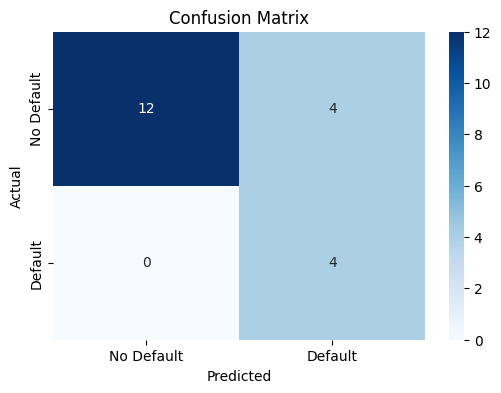

In [13]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define dataset path
dataset_path = "/path/to/RAF-DB"  # Update this path

# Image preprocessing parameters
IMG_SIZE = 48  # Resize images to 48x48 for faster processing
X, y = [], []

# Read labels from RAF-DB annotation file
label_file = os.path.join(dataset_path, "EmoLabel/list_patition_label.txt")
labels = {}

with open(label_file, "r") as file:
    for line in file:
        parts = line.strip().split()
        labels[parts[0]] = int(parts[1]) - 1  # Convert labels from 1-based to 0-based index

# Load images and preprocess
image_folder = os.path.join(dataset_path, "Image/aligned")  # Adjust path as needed

for img_name, label in labels.items():
    img_path = os.path.join(image_folder, img_name)

    if os.path.exists(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 48x48
        X.append(img.flatten())  # Flatten image to 1D vector
        y.append(label)

# Convert to NumPy arrays
X = np.array(X, dtype="float32") / 255.0  # Normalize images
y = np.array(y)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded: {X_train.shape[0]} Train, {X_test.shape[0]} Test, {len(set(y))} Classes")

# Standardize features (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel for non-linear classification
svm_clf.fit(X_train, y_train)

# Predictions
y_pred = svm_clf.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 SVM Test Accuracy: {accuracy:.4f}")

# Classification Report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM on RAF-DB")
plt.show()
